<a href="https://colab.research.google.com/github/irawan555/MachineLearningTasks/blob/main/UAS/Code/CIFAR_10_Irawan_Mardiansyah_1103210174_TK4504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Irawan Mardiansyah

NIM : 1103210174

Kelas : TK4504

Tugas : UAS

Dataset: CIFAR-10

Link GPT: https://chatgpt.com/share/9a6c9f52-c534-408f-b1d2-f4c58dd8728e

# **Langkah 1: Import Library yang Diperlukan**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# **Langkah 2: Memuat dan Menampilkan Gambar dalam Dataset**

170498071/170498071 [==============================] - 4s 0us/step


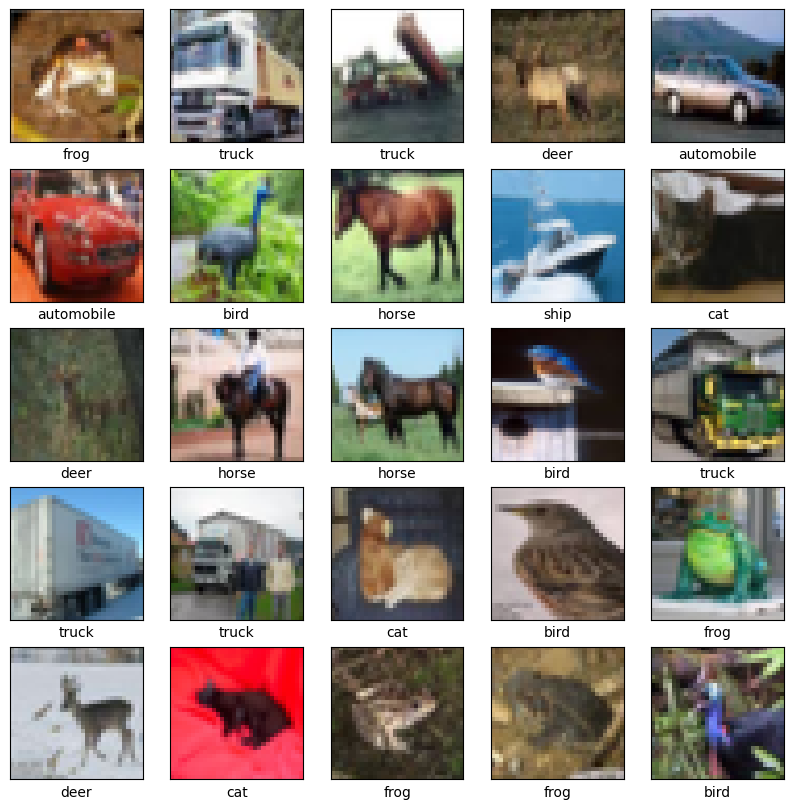

In [2]:
# Memuat dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Menampilkan beberapa gambar dari dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

plot_images(x_train, y_train, class_names)

# **Langkah 3: Pengolahan Data**

In [3]:
# Normalisasi gambar
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# **Langkah 4: Membangun Model CNN**

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Langkah 5: Melatih Model**

In [5]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 15s 6ms/step - loss: 1.6880 - accuracy: 0.3807 - val_loss: 1.4091 - val_accuracy: 0.4890
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3575 - accuracy: 0.5159 - val_loss: 1.1774 - val_accuracy: 0.5835
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2170 - accuracy: 0.5723 - val_loss: 1.1198 - val_accuracy: 0.6004
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1258 - accuracy: 0.6073 - val_loss: 1.0211 - val_accuracy: 0.6364
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0541 - accuracy: 0.6360 - val_loss: 0.9678 - val_accuracy: 0.6578
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9968 - accuracy: 0.6541 - val_loss: 0.9099 - val_accuracy: 0.6783
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9446 - accuracy: 0.6713 - val_loss: 0.9404 - val_accuracy

# **Langkah 6: Membuat Prediksi dan Visualisasi**

313/313 [==============================] - 2s 5ms/step


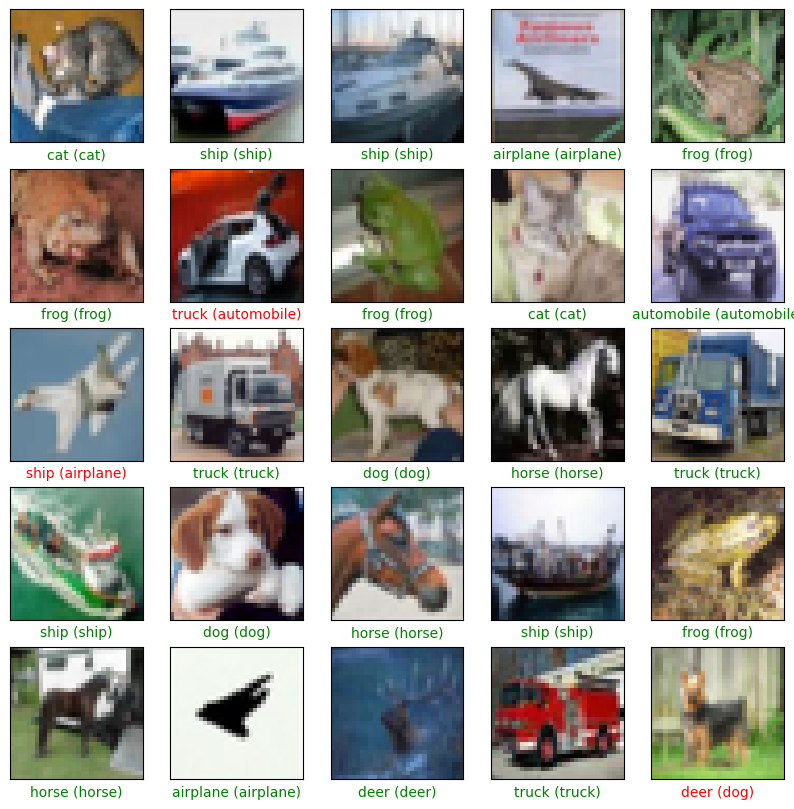

In [6]:
# Membuat prediksi pada dataset uji
predictions = model.predict(x_test)

def plot_predictions(images, true_labels, pred_labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        true_label = class_names[np.argmax(true_labels[i])]
        pred_label = class_names[np.argmax(pred_labels[i])]
        color = 'green' if true_label == pred_label else 'red'
        plt.xlabel(f"{pred_label} ({true_label})", color=color)
    plt.show()

plot_predictions(x_test, y_test, predictions, class_names)

# **Langkah 7: Visualisasi Heatmap**

313/313 [==============================] - 1s 3ms/step


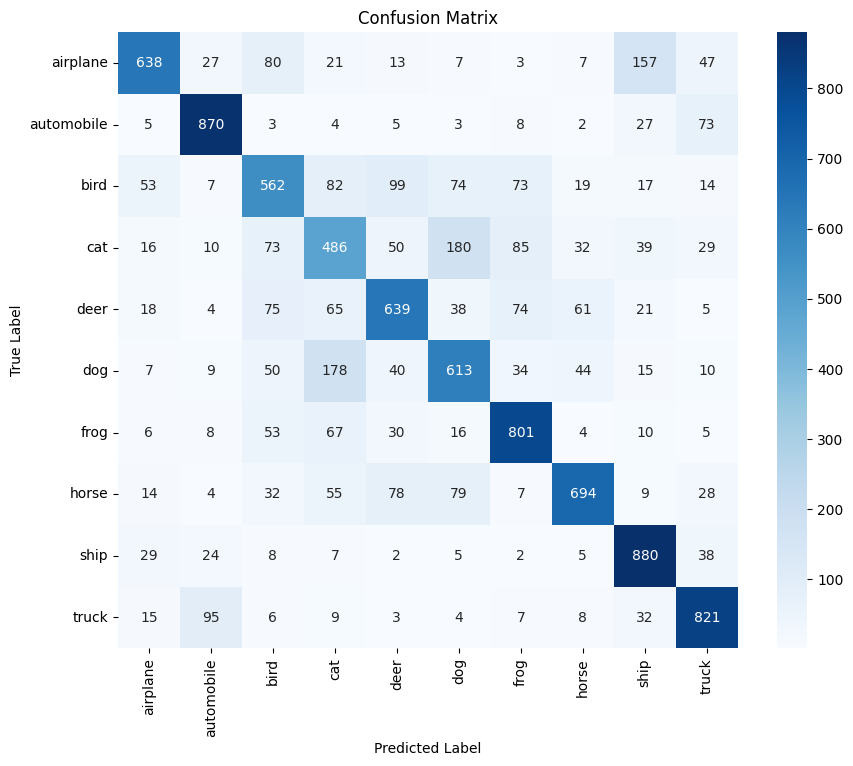

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat prediksi pada dataset uji
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Membuat matriks kebingungan
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualisasi matriks kebingungan sebagai heatmap
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix, class_names)